https://scikit-learn.org/stable/modules/clustering.html#clustering

# Density estimation 

Use scikit learn to estimate kernel density. 
How we build our bins? 

In [183]:
import numpy
import pandas
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt
from scipy.stats import norm

visits_per_day = Undreads or rows, One row for each day and the number is how many visist the web site had. 

In [184]:
df = pandas.read_csv('3_visits_per_day.csv', index_col=False, header=0);
df

,visits
0,3.594672e-01
1,7.209679e-02
2,1.512295e-01
3,9.095790e-01
4,9.097679e-01
5,7.316170e-01
6,5.822610e-01
7,1.364806e-03
8,7.070854e-05
9,3.830485e-01


# 1° problem : how many bins I have to use? 

# 2° problem : how I can understand the model? 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


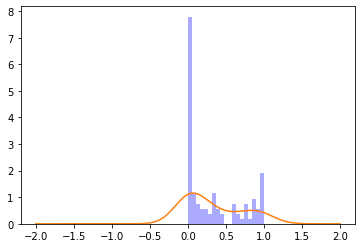

In [199]:
X_plot =  numpy.linspace(-2, 2, 1000)[:, numpy.newaxis]


kde = KernelDensity(kernel='gaussian', bandwidth= 0.2).fit(df.values) #bandwidth == variance 

log_dens = kde.score_samples(X_plot) # tell me what is the estimated density for that value 

plt.hist(df.values, bins=numpy.linspace(0, 1, 20), fc='#AAAAFF', normed=True) # 20 bins, purple,  normalized

#plt.hist(df.values, bins=numpy.linspace(0, 1, 10), fc='#AAAAFF', normed=True) # 10 bins, purple,  normalized

#plt.hist(df.values, bins=numpy.linspace(0, 1, 5), fc='#AAAAFF', normed=True) # 20 bins, purple,  normalized


plt.plot(X_plot, numpy.exp(log_dens))
plt.show()



# --------------------------------------------

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


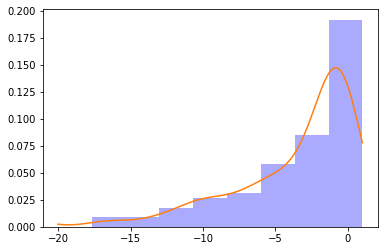

In [28]:
df = pandas.read_csv('3_visits_per_day.csv', index_col=False, header=0);
X_plot =  numpy.linspace(-20, 1, 1000)[:, numpy.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=1.4).fit(numpy.log(df.values))
# here I needed to change the bandwidth value to 1.4
log_dens = kde.score_samples(X_plot)

plt.hist(numpy.log(df.values), bins=numpy.linspace(-20, 1, 10), fc='#AAAAFF', normed=True)


plt.plot(X_plot, numpy.exp(log_dens))
plt.show()


#    PRINCIPAL COMPONENTS 
the idea of this methodology is to reduce a dataset containing hundred variables and reduce it as much as we can .

In clustering we have a visual output so to plot data we need 2 values. 

In [200]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas
from sklearn import preprocessing

In [201]:
#######################################################################
#a more real example

df       = pandas.read_csv('3_PCA.csv', index_col=False, header=0);
#sales informations about tablets, mobile phone, TV2 and radios.
#understand the data: negative one is when you bring back your TV to the store.
df

,Sales_Tablets,Sales_Mobile_Phone,Sales_TVs,Sales_Radios
0,908.777626,196.249836,7708.873780,832.529142
1,896.286642,192.891470,1774.628873,333.280441
2,167.514041,44.320581,7169.800536,818.145226
3,709.562644,152.940776,9492.708957,1054.444901
4,287.215946,66.632344,5235.426196,571.744944
5,366.165619,84.303900,5270.549000,667.820071
6,451.434171,104.763730,7844.411604,932.440649
7,872.780592,181.659564,7446.628721,824.325930
8,4.894847,17.326438,4243.396910,464.852207
9,672.690691,139.797663,2709.330788,416.907756


### If we want to analyze the correlations of this variables, how can we actually plot all of them.  We can only plot pairs of them.

In [202]:
data     = df[["Sales_Tablets","Sales_Mobile_Phone","Sales_TVs","Sales_Radios"]].values
data = preprocessing.scale(data)

In [205]:
pca = PCA(n_components=3)
#pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

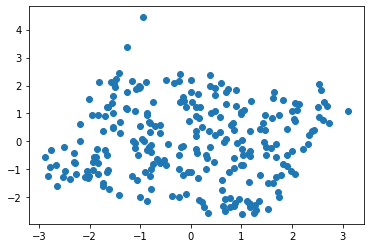

In [206]:
D = pca.transform(data)
plt.scatter(D[:,0],D[:,1])
plt.show()


In [207]:
D.shape

(251, 3)

# K-means

the simplest clustering algorithm we can use in scikit learn.

In [208]:
from sklearn import datasets
import numpy as np
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [209]:
df       = pandas.read_csv('3_customer_website.csv', index_col=False, header=0);
# the purchases in USD that people did on this website 
df 

,Time_Website_minutes,Purchases_in_$
0,4.455048,24.289006
1,10.651839,9.725943
2,6.975436,25.738505
3,12.198523,10.789239
4,10.561042,9.882959
5,4.639377,25.593880
6,10.272221,9.442359
7,4.161660,26.861702
8,4.452843,25.390964
9,11.010613,10.200938


## in k-means we need to specify how many clusters we want, and this is the more difficult part because there is no easy way to define it. 

[[ 4.09581582 25.27435184]
 [11.41201664 10.0676265 ]]


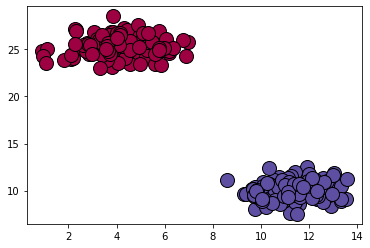

In [226]:
data = df[["Time_Website_minutes","Purchases_in_$"]].values

#I create an istance of k-means object and I define 2 clusters.

ds  = KMeans(n_clusters=2).fit(data)    # try n_clusters = ?  3 

# we can print the centers of the clusters
centers = ds.cluster_centers_;  
print(centers)

# we can print the labels: if a value own to the cluster 1 or cluster 2 
#labels  = ds.labels_; 
#print(labels.shape)
#print(labels)


#plot each corresponding to the color 
def plot_results():
    unique_labels = set(ds.labels_)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
             
            col = 'k'

        class_member_mask = (ds.labels_ == k)

        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

    plt.show()
    return

plot_results()


# Now we have to interpreter data: for example in the plot we can see 2 kind of people.

In [223]:
siho = metrics.silhouette_samples(data,ds.labels_)

#print(siho<-0.5)

print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data, ds.labels_))  # -1 to 1 value

# you can decide the number of clusters according to the silouette feature 


Silhouette Coefficient: 0.893


# DBScan 

Probably the best method for clustering, DBScan (Density-Based spatial clustering of applications with noise).

The algorithm will estimate the density of our data. 

With DBScan we don't need to say in advance the number of clusters. 




In [227]:
from sklearn import datasets
import numpy as np
import pandas
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [228]:
df       = pandas.read_csv('3_customer_website.csv', index_col=False, header=0);
data     = df[["Time_Website_minutes","Purchases_in_$"]].values
df 

,Time_Website_minutes,Purchases_in_$
0,4.455048,24.289006
1,10.651839,9.725943
2,6.975436,25.738505
3,12.198523,10.789239
4,10.561042,9.882959
5,4.639377,25.593880
6,10.272221,9.442359
7,4.161660,26.861702
8,4.452843,25.390964
9,11.010613,10.200938


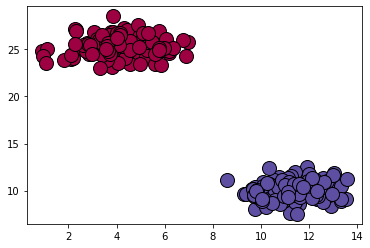

In [240]:
# min number of sample to be considered a core point, the minimum size of a cluster. (1 - 5 - 10 )
# eps = number of point to be considered in the same area (to be considered close) (0.5 - 1 - 3 )
# metric = 'eucledian'  the distance function 

ds  = DBSCAN(eps=3, min_samples=5, metric='euclidean').fit(data)
#can try 0.9, and the third cluster will disappear


def plot_results():
    unique_labels = set(ds.labels_)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
             
            col = 'k'

        class_member_mask = (ds.labels_ == k)

        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

    plt.show()
    return


plot_results()


## the first group is similar to the group in k-means, the black point are considered as outliers (points that not belong to any group). We can consider the black points as noise according to the DBScan parameters. 

In [241]:
# is useful to compare the output of clustering and the different methods or the different parameters. 
siho = metrics.silhouette_samples(data,ds.labels_)

#print(siho<-0.5)

print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data, ds.labels_))
 

Silhouette Coefficient: 0.893


# PCA AND CLUSTERING

https://www.kaggle.com/joniarroba/65-world-indexes-gathered



In [242]:
from sklearn import *
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [243]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [244]:
data = pd.read_csv("3_world.csv")
data

,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.943877,26.830000,7.834000,100.000000,0.778925,9.192879,1.191457e+01,5.22,104.194175,86.956222,1.510000,11.300000,100.0,17.492590,67.035940,5.2,0.512555,27.973433,57.271805,0.750000,0.067443,1.815164,21.852720,317.497587,62448.017620,22.644476,64992.340460,0.000000,2.2,2.300000,4963.000000,-3.374490,96.30,26.800000,81.6,13.0,4.000000,12.631000,116.51,9.019499,6.0,37.390000,12.347838,0.186818,97.059610,98.850570,99.43699,1.511550,72.000000,11.467400,6.552840,9.573011,9.590637,0.013000,0.154407,47.752676,1.654740,111.061300,39.644970,13.772622,31.798391,74.101120,27.288097,0.140000,2.800000
1,Australia,0.934958,34.010000,12.059000,100.000000,1.090351,16.519210,-4.561812e+00,30.27,107.789440,158.840776,1.360000,6.300000,100.0,20.221070,40.995720,5.2,3.330412,19.193731,95.367798,3.930000,0.110130,-0.017410,17.746742,990.721004,42831.061630,28.327407,42260.612950,33.406620,1.1,3.400000,6382.000000,17.132090,84.56,39.900000,82.4,16.1,6.000000,12.963381,131.23,3.819851,6.5,32.730000,1337.393551,8.984550,94.448950,107.777370,104.83840,6.118623,130.000000,-6.789013,5.110410,8.998704,12.303007,0.025000,0.157953,4.632202,2.385620,135.535430,30.530973,27.711793,65.333748,86.334090,21.361426,

In [245]:
print_full(data)

                                   Id  Human Development Index HDI-2014  Gini coefficient 2005-2013  Adolescent birth rate 15-19 per 100k 20102015  Birth registration funder age 5 2005-2013  Carbon dioxide emissionsAverage annual growth  Carbon dioxide emissions per capita 2011 Tones  Change forest percentable 1900 to 2012  Change mobile usage 2009 2014  Consumer price index 2013  Domestic credit provided by financial sector 2013  Domestic food price level 2009 2014 index  Domestic food price level 2009-2014 volitility index  Electrification rate or population  Expected years of schooling - Years  Exports and imports percentage GPD 2013  Female Suicide Rate 100k people  Foreign direct investment net inflows percentage GDP 2013  Forest area percentage of total land area 2012  Fossil fuels percentage of total 2012  Fresh water withdrawals 2005  Gender Inequality Index 2014  General government final consumption expenditure - Annual growth 2005 2013  \
0                              Norway

In [246]:
ids  = pd.DataFrame(data['Id'])
del data['Id']
min_max_scaler     =  preprocessing.MinMaxScaler()
original_dataset   =  min_max_scaler.fit_transform(data)
#ids
data

,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,0.943877,26.830000,7.834000,100.000000,0.778925,9.192879,1.191457e+01,5.22,104.194175,86.956222,1.510000,11.300000,100.0,17.492590,67.035940,5.2,0.512555,27.973433,57.271805,0.750000,0.067443,1.815164,21.852720,317.497587,62448.017620,22.644476,64992.340460,0.000000,2.2,2.300000,4963.000000,-3.374490,96.30,26.800000,81.6,13.0,4.000000,12.631000,116.51,9.019499,6.0,37.390000,12.347838,0.186818,97.059610,98.850570,99.43699,1.511550,72.000000,11.467400,6.552840,9.573011,9.590637,0.013000,0.154407,47.752676,1.654740,111.061300,39.644970,13.772622,31.798391,74.101120,27.288097,0.140000,2.800000
1,0.934958,34.010000,12.059000,100.000000,1.090351,16.519210,-4.561812e+00,30.27,107.789440,158.840776,1.360000,6.300000,100.0,20.221070,40.995720,5.2,3.330412,19.193731,95.367798,3.930000,0.110130,-0.017410,17.746742,990.721004,42831.061630,28.327407,42260.612950,33.406620,1.1,3.400000,6382.000000,17.132090,84.56,39.900000,82.4,16.1,6.000000,12.963381,131.23,3.819851,6.5,32.730000,1337.393551,8.984550,94.448950,107.777370,104.83840,6.118623,130.000000,-6.789013,5.110410,8.998704,12.303007,0.025000,0.157953,4.632202,2.385620,135.535430,30.530973,27.711793,65.333748,86.334090,21.361426,0.190000,4.000000
2,

In [130]:
ids

,Id,clusters
0,Norway,2
1,Australia,2
2,Switzerland,2
3,Denmark,2
4,Netherlands,2
5,Germany,2
6,Ireland,2
7,United States,2
8,Canada,2
9,New Zealand,2


In [129]:
##########################################################################################################
#we can cluster the countries based on the original attributes
ds                    = KMeans(n_clusters=3).fit(original_dataset)
clustered             = pd.DataFrame(ids)
clustered["clusters"] = ds.labels_[:, np.newaxis]
print_full(clustered)

#if you see the data are sorted according to the developing economy 
clustered.shape

                                   Id  clusters
0                              Norway         2
1                           Australia         2
2                         Switzerland         2
3                             Denmark         2
4                         Netherlands         2
5                             Germany         2
6                             Ireland         2
7                       United States         2
8                              Canada         2
9                         New Zealand         2
10                          Singapore         2
11                         Hong Kong          2
12                      Liechtenstein         2
13                             Sweden         2
14                     United Kingdom         2
15                            Iceland         2
16                        South Korea         2
17                             Israel         2
18                         Luxembourg         2
19                              Japan   

(188, 2)

In [107]:
##########################################################################################################
#we can run PCA and extract one component and then cluster
pca = PCA(n_components=1)
pca.fit(original_dataset)
transf_dataset = pca.transform(original_dataset)
print(pca.explained_variance_ratio_)

Q = transf_dataset
clustered["PCA_1"] = Q
ds = KMeans(n_clusters=3).fit(Q)
clustered["clusters_PCA"] = ds.labels_
print_full(clustered)


[0.46397101]
                                   Id  clusters     PCA_1  clusters_PCA
0                              Norway         1 -1.387436             1
1                           Australia         1 -1.500972             1
2                         Switzerland         1 -1.329357             1
3                             Denmark         1 -1.480184             1
4                         Netherlands         1 -1.445481             1
5                             Germany         1 -1.385511             1
6                             Ireland         1 -1.259065             1
7                       United States         1 -1.400846             1
8                              Canada         1 -1.258965             1
9                         New Zealand         1 -1.238265             1
10                          Singapore         1 -1.295481             1
11                         Hong Kong          1 -1.378178             1
12                      Liechtenstein         1 -1.

In [108]:
##########################################################################################################
siho = metrics.silhouette_samples(data,ds.labels_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(Q, clustered["clusters_PCA"]))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(original_dataset, clustered["clusters"]))
#Both silhoutes are very similar, so that's good


Silhouette Coefficient: 0.604
Silhouette Coefficient: 0.197


In [109]:
##########################################################################################################
#analyzing the results, I will use the PCA clustering results

reporting_table = pd.concat((data,clustered),axis=1)
grouped = reporting_table.groupby("clusters_PCA").mean()
print(grouped)

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print_full(grouped.transpose())


              Human Development Index HDI-2014  Gini coefficient 2005-2013  \
clusters_PCA                                                                 
0                                     0.698451                   41.952480   
1                                     0.847652                   32.441144   
2                                     0.484478                   40.951154   

              Adolescent birth rate 15-19 per 100k 20102015  \
clusters_PCA                                                  
0                                                 47.915652   
1                                                 17.845308   
2                                                 91.752558   

              Birth registration funder age 5 2005-2013  \
clusters_PCA                                              
0                                             91.821256   
1                                             99.636816   
2                                             55.185897  

# OUTLIER DETECTION

We usually assume we have no outliers in our dataset. 


https://scikit-learn.org/stable/modules/outlier_detection.html


In [247]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.covariance import EllipticEnvelope

In [248]:
##########################################################
# more realistic example
import pandas
from sklearn import preprocessing

In [249]:
df       = pandas.read_csv('3_PCA.csv', index_col=False, header=0);
data     = df[["Sales_Tablets","Sales_Mobile_Phone","Sales_TVs","Sales_Radios"]].values
data = preprocessing.scale(data)

In [250]:
df

,Sales_Tablets,Sales_Mobile_Phone,Sales_TVs,Sales_Radios
0,908.777626,196.249836,7708.873780,832.529142
1,896.286642,192.891470,1774.628873,333.280441
2,167.514041,44.320581,7169.800536,818.145226
3,709.562644,152.940776,9492.708957,1054.444901
4,287.215946,66.632344,5235.426196,571.744944
5,366.165619,84.303900,5270.549000,667.820071
6,451.434171,104.763730,7844.411604,932.440649
7,872.780592,181.659564,7446.628721,824.325930
8,4.894847,17.326438,4243.396910,464.852207
9,672.690691,139.797663,2709.330788,416.907756


In [256]:
clf = EllipticEnvelope(store_precision=True,contamination =0.05) # low percentage
#doesn't works very well when we have an high dimension data
clf.fit(data)

EllipticEnvelope(assume_centered=False, contamination=0.05, random_state=None,
                 store_precision=True, support_fraction=None)

In [254]:
q = clf.predict(data)
q

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [257]:
print(q.shape)

(251,)


In [258]:
q =q[q==-1]   
print(len(q))     # how many of them can be considerd outliers ?

13


# Novelty detection - OneClassSVM funcion

To understand if a new osservation is a new outlier or not. 

In [259]:
# assume we don't have outlier 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [260]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations   - this truly belong to the same structure 
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

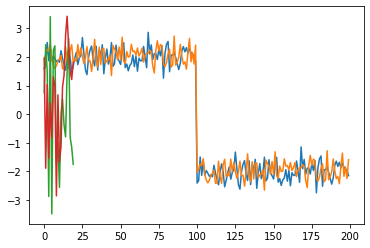

In [267]:
import matplotlib.pyplot as plt
plt.plot(X_train)
#plt.plot(X_test)
plt.plot(X_outliers)
plt.show()

In [279]:
# fit the model
clf              = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)


# the prediction is 1 is the place where the density is higher
y_pred_train     = clf.predict(X_train)
y_pred_test      = clf.predict(X_test)
y_pred_outliers  = clf.predict(X_outliers)

y_pred_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1,  1,  1,  1, -1])

In [280]:
n_error_train    = y_pred_train[y_pred_train == -1].size
n_error_test     = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size



n_error_outliers

0

In [277]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


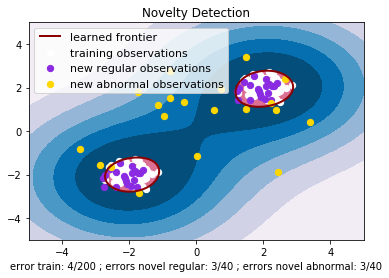

In [278]:
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()


# we generate 2 clusters
# 

# Comparing different clustering methods 

This example shows characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a ‘null’ situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

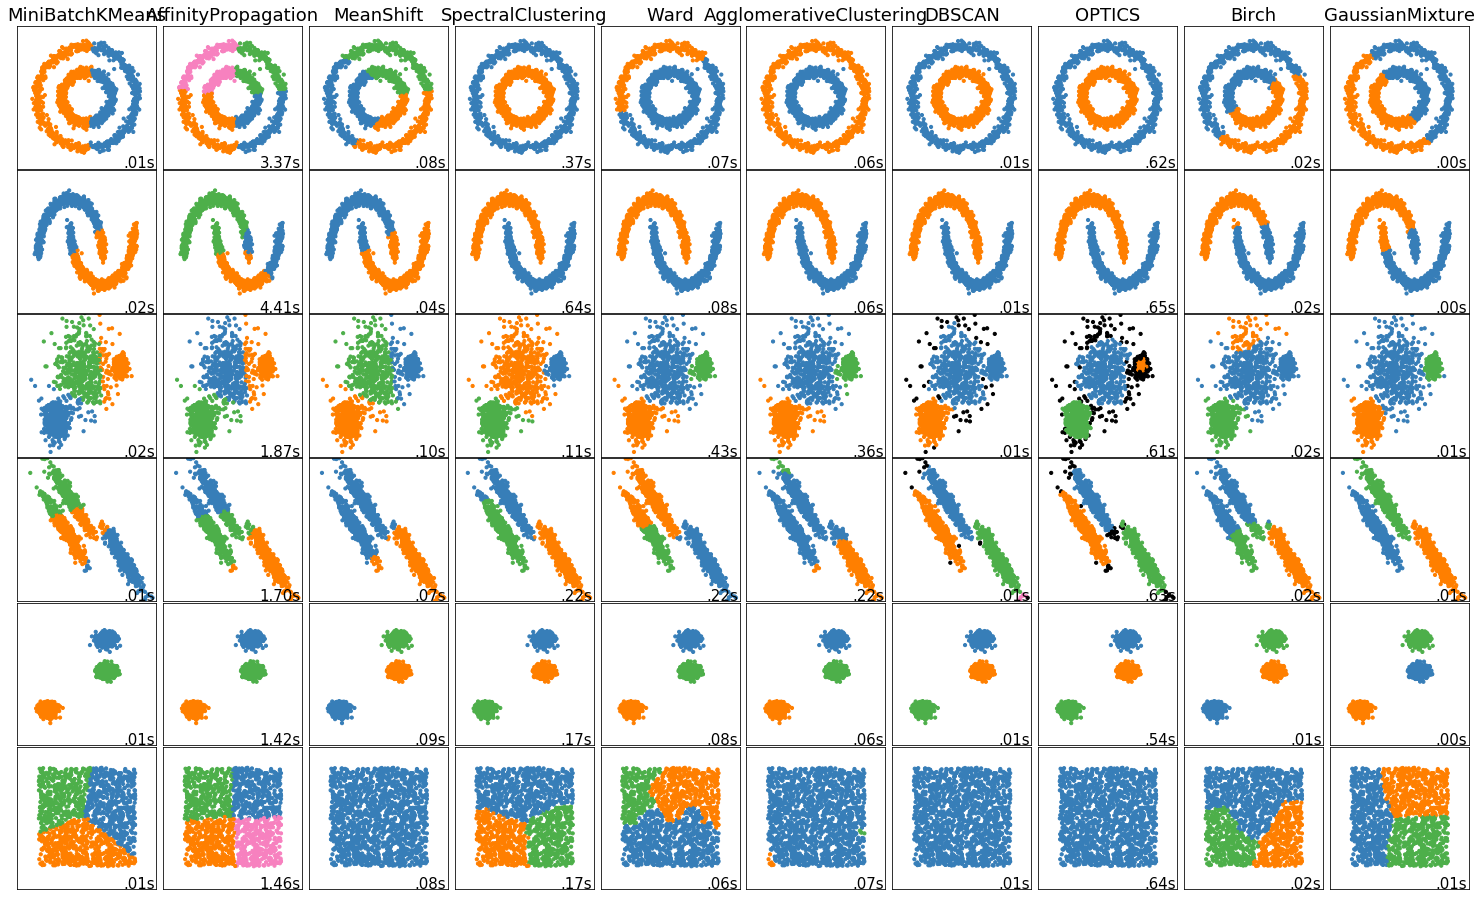

In [179]:
#time t = time.time() - 1 January 1970

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()